<a href="https://colab.research.google.com/github/himanshuk4625/nifty50-stock-price/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
df=pd.read_csv('Nifty50 Data.csv')
df.shape

(49500, 8)

As Data is too Big so firstly fitting model on a single stock 

# 1- Linear Regression 

In [ ]:
df_SBILIFE=df[df['Symbol']=='SBILIFE']
df_SBILIFE

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
37620,2019-05-02,SBILIFE,639.950012,658.000000,639.950012,650.500000,645.937805,1022283
37621,2019-05-03,SBILIFE,650.000000,666.000000,648.950012,664.150024,659.492065,809596
37622,2019-05-06,SBILIFE,660.000000,667.799988,652.200012,660.000000,655.371094,510425
37623,2019-05-07,SBILIFE,658.000000,665.250000,658.000000,662.099976,657.456421,400330
37624,2019-05-08,SBILIFE,655.049988,661.400024,649.950012,650.549988,645.987366,290783
...,...,...,...,...,...,...,...,...
38605,2023-04-24,SBILIFE,1106.000000,1113.650024,1090.599976,1105.699951,1105.699951,1337055
38606,2023-04-25,SBILIFE,1106.000000,1122.150024,1101.050049,1105.849976,1105.849976,1099269
38607,2023-04-26,SBILIFE,1106.000000,1122.000000,1104.000000,1118.300049,1118.300049,993607
38608,2023-04-27,SBILIFE,1138.750000,1145.000000,1125.000000,1137.050049,1137.050049,1895316


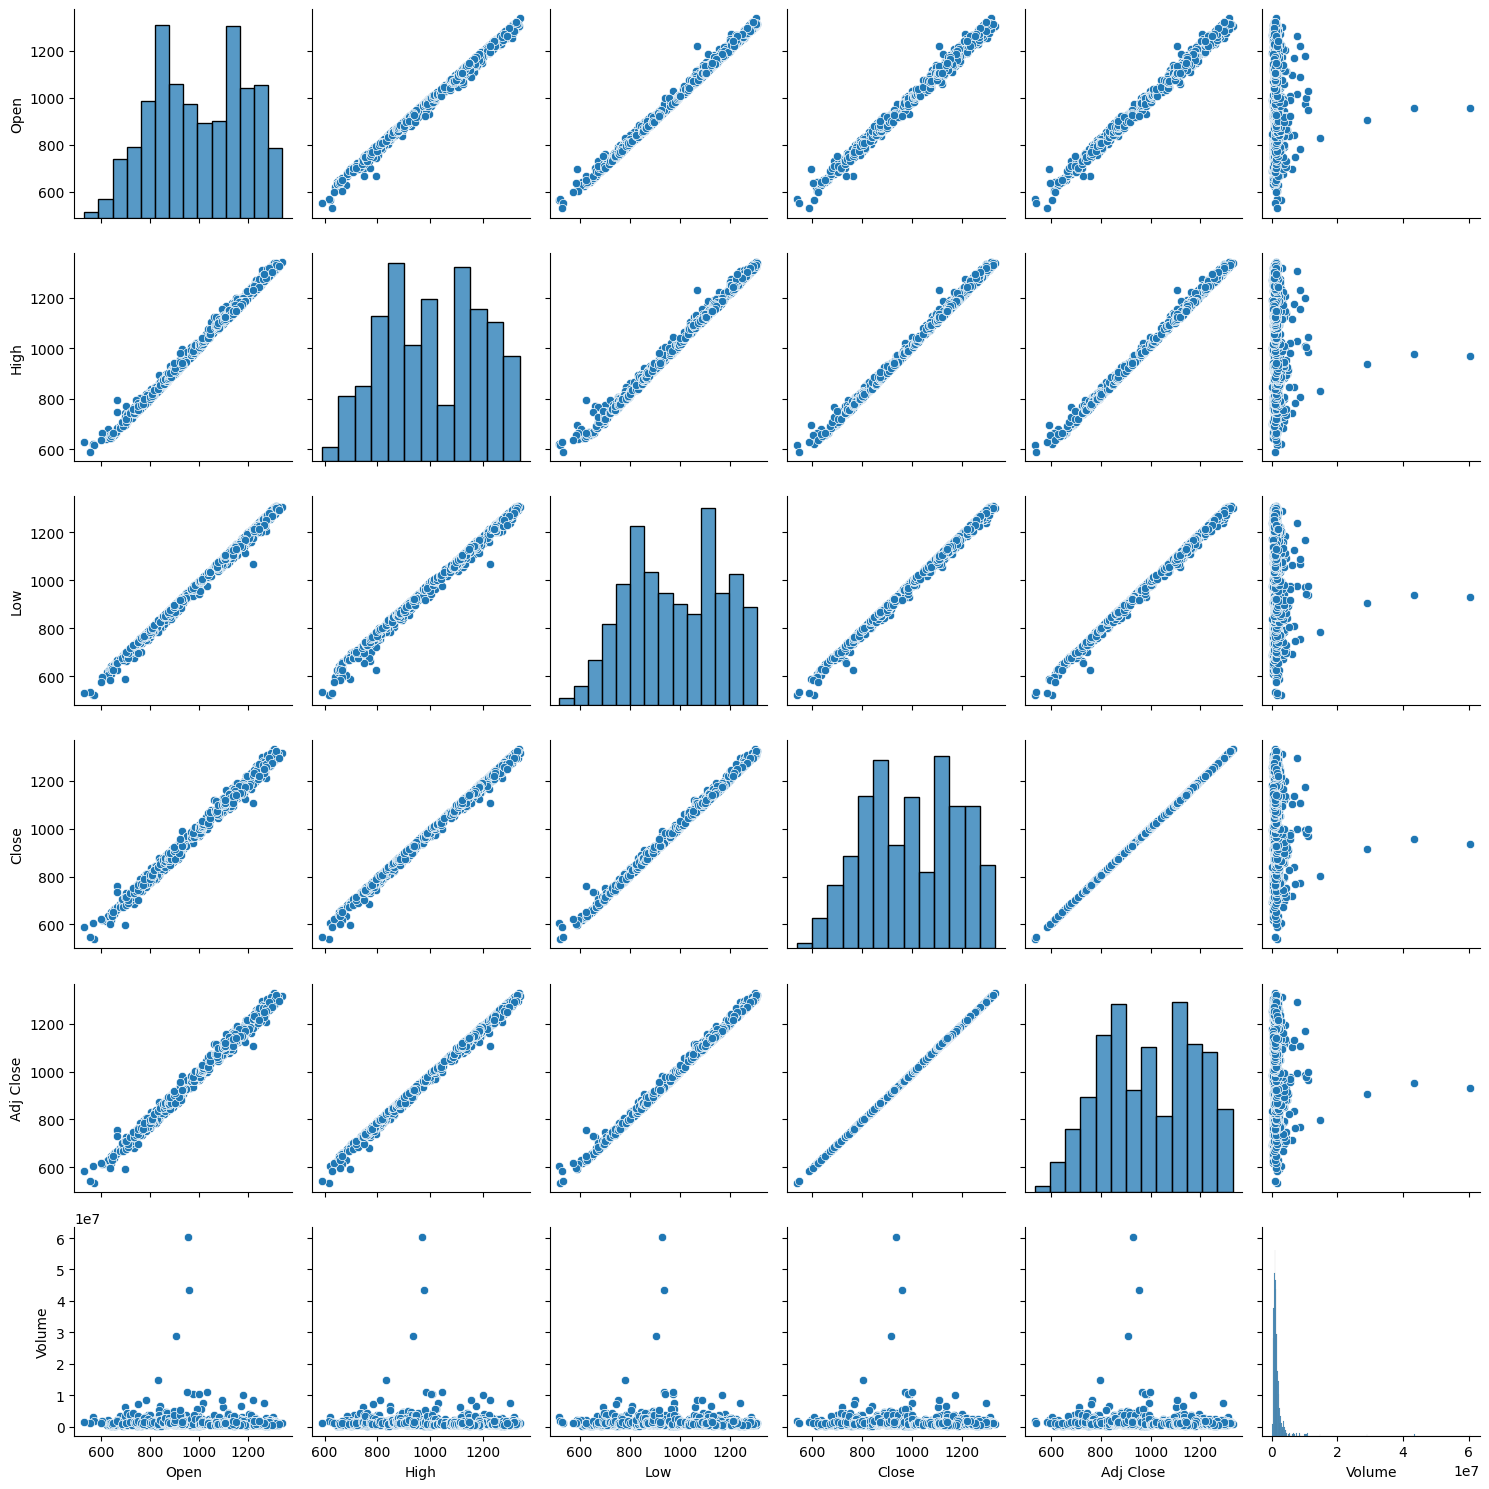

In [ ]:
sns.pairplot(df_SBILIFE)
plt.tight_layout()

In [ ]:
# df_SBILIFE["Date"] = pd.to_datetime(df_SBILIFE["Date"])
# df_SBILIFE=df_SBILIFE.drop(['Date'],axis=1)
df_SBILIFE=df_SBILIFE.drop(['Symbol'],axis=1)
df_SBILIFE

,Date,Open,High,Low,Close,Adj Close,Volume
37620,2019-05-02,639.950012,658.000000,639.950012,650.500000,645.937805,1022283
37621,2019-05-03,650.000000,666.000000,648.950012,664.150024,659.492065,809596
37622,2019-05-06,660.000000,667.799988,652.200012,660.000000,655.371094,510425
37623,2019-05-07,658.000000,665.250000,658.000000,662.099976,657.456421,400330
37624,2019-05-08,655.049988,661.400024,649.950012,650.549988,645.987366,290783
...,...,...,...,...,...,...,...
38605,2023-04-24,1106.000000,1113.650024,1090.599976,1105.699951,1105.699951,1337055
38606,2023-04-25,1106.000000,1122.150024,1101.050049,1105.849976,1105.849976,1099269
38607,2023-04-26,1106.000000,1122.000000,1104.000000,1118.300049,1118.300049,993607
38608,2023-04-27,1138.750000,1145.000000,1125.000000,1137.050049,1137.050049,1895316


<ipython-input-31-56f305d248eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_SBILIFE.corr(),annot=True)


<Axes: >

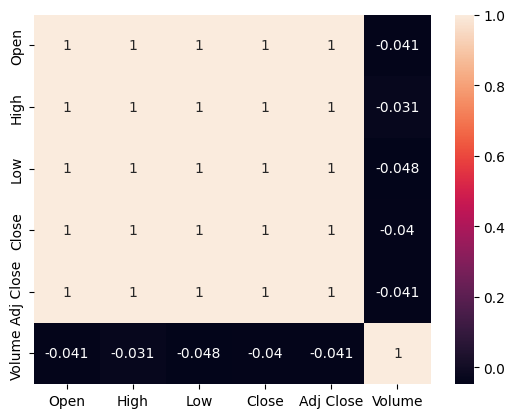

In [ ]:
sns.heatmap(df_SBILIFE.corr(),annot=True)

## Volume is not highly co-related with close column
## so neglacting it

In [ ]:
df_SBILIFE=df_SBILIFE.drop(['Volume'],axis=1)


In [ ]:
X=df_SBILIFE.drop(['Close','Date'],axis=1)
y=df_SBILIFE['Close']

In [ ]:
X

,Open,High,Low,Adj Close
37620,639.950012,658.000000,639.950012,645.937805
37621,650.000000,666.000000,648.950012,659.492065
37622,660.000000,667.799988,652.200012,655.371094
37623,658.000000,665.250000,658.000000,657.456421
37624,655.049988,661.400024,649.950012,645.987366
...,...,...,...,...
38605,1106.000000,1113.650024,1090.599976,1105.699951
38606,1106.000000,1122.150024,1101.050049,1105.849976
38607,1106.000000,1122.000000,1104.000000,1118.300049
38608,1138.750000,1145.000000,1125.000000,1137.050049


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Adj Close
0,0.136077,0.090685,0.152286,0.139367
1,0.148515,0.101346,0.163656,0.156459
2,0.160891,0.103745,0.167761,0.151262
3,0.158416,0.100346,0.175088,0.153892
4,0.154765,0.095216,0.164919,0.139429


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
38412,1147.400024,1149.574200
38413,1139.750000,1141.951649
38414,1139.849976,1142.105808
38415,1138.949951,1141.087629
38416,1155.449951,1157.392102


In [ ]:
Acc=[]

In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9989647973217443


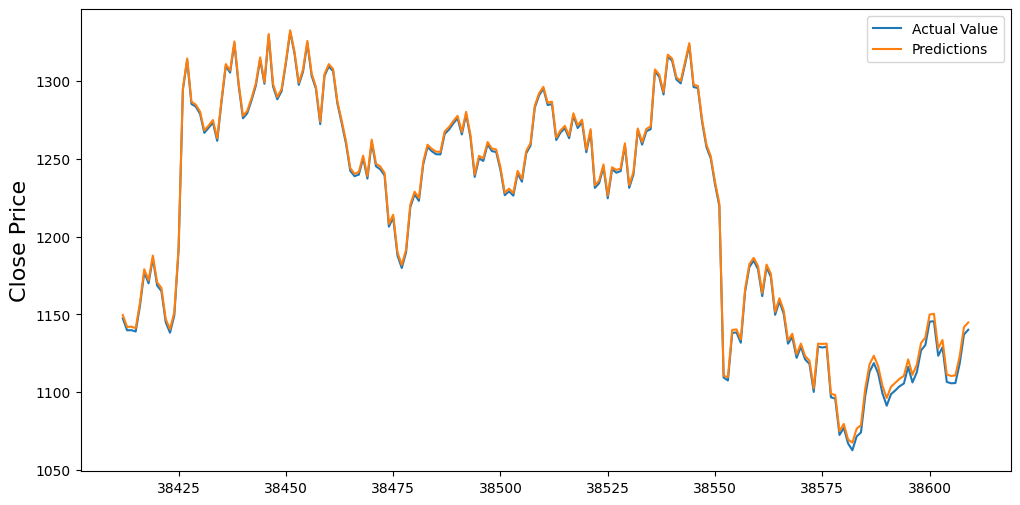

In [ ]:
plt.figure(figsize=(12,6))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# LSTM

In [ ]:

# Extract the 'Close' column for stock prices
dataset = df_SBILIFE['Close'].values.reshape(-1, 1)

# Perform feature scaling using Min-Max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Define the sequence length for creating input sequences
sequence_length = 50

# Create input sequences and corresponding target values
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

# Convert the data to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [ ]:
# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# print(X_train)
# print(X_test)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on the testing set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)



Epoch 1/10
24/24 [==============================] - 6s 54ms/step - loss: 0.0642
Epoch 2/10
24/24 [==============================] - 2s 68ms/step - loss: 0.0062
Epoch 3/10
24/24 [==============================] - 2s 88ms/step - loss: 0.0033
Epoch 4/10
24/24 [==============================] - 1s 54ms/step - loss: 0.0027
Epoch 5/10
24/24 [==============================] - 1s 53ms/step - loss: 0.0025
Epoch 6/10
24/24 [==============================] - 1s 52ms/step - loss: 0.0024
Epoch 7/10
24/24 [==============================] - 1s 54ms/step - loss: 0.0023
Epoch 8/10
24/24 [==============================] - 1s 54ms/step - loss: 0.0022
Epoch 9/10
24/24 [==============================] - 1s 54ms/step - loss: 0.0022
Epoch 10/10
6/6 [==============================] - 1s 18ms/step - loss: 0.0022
Test Loss: 0.0022155691403895617
6/6 [==============================] - 1s 22ms/step


In [ ]:
df_SBILIFE

,Date,Open,High,Low,Close,Adj Close
37620,2019-05-02,639.950012,658.000000,639.950012,650.500000,645.937805
37621,2019-05-03,650.000000,666.000000,648.950012,664.150024,659.492065
37622,2019-05-06,660.000000,667.799988,652.200012,660.000000,655.371094
37623,2019-05-07,658.000000,665.250000,658.000000,662.099976,657.456421
37624,2019-05-08,655.049988,661.400024,649.950012,650.549988,645.987366
...,...,...,...,...,...,...
38605,2023-04-24,1106.000000,1113.650024,1090.599976,1105.699951,1105.699951
38606,2023-04-25,1106.000000,1122.150024,1101.050049,1105.849976,1105.849976
38607,2023-04-26,1106.000000,1122.000000,1104.000000,1118.300049,1118.300049
38608,2023-04-27,1138.750000,1145.000000,1125.000000,1137.050049,1137.050049


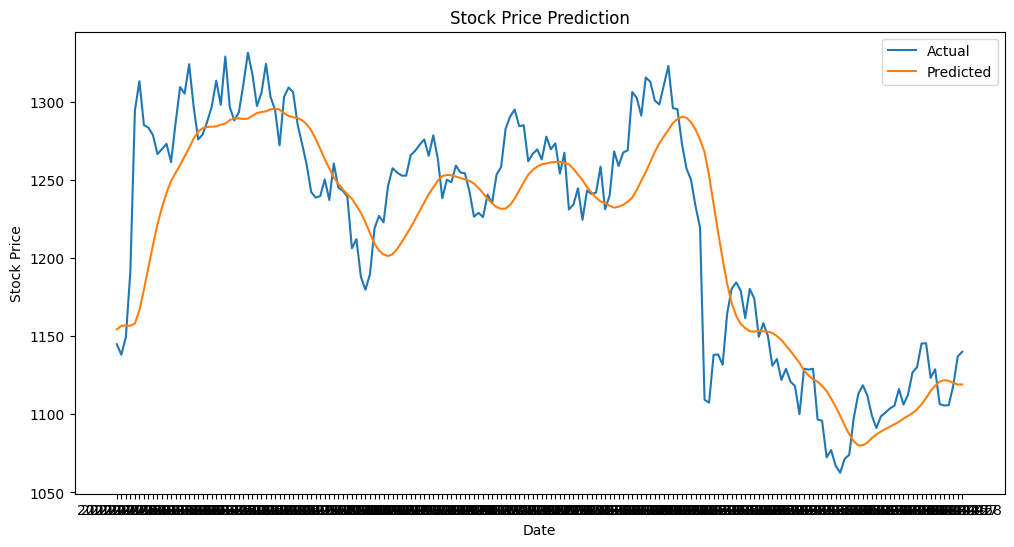

In [ ]:
# Plot the actual and predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(df_SBILIFE['Date'][split_index+sequence_length:], df_SBILIFE['Close'][split_index+sequence_length:], label='Actual')
plt.plot(df_SBILIFE['Date'][split_index+sequence_length:], predictions, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

# Making a Function for ananlysis and prediction of Nifty50 Stock Price

In [50]:
def stockPredictionModel(Company_name, Number_of_share, Buying_date, Selling_date):
    df = pd.read_csv('Nifty50 Data.csv')
    df.head()
    df["Date"] = pd.to_datetime(df["Date"])
    # name_of_stock = input("Enter Name Of Stock")
    # number_of_share = int(input("Number Of Share"))
    Y = df[df["Symbol"]==Company_name][["Close"]]
    # start_date = input("Start Date")
    # end_date = input("End Date")
    Buying_date = pd.to_datetime(Buying_date)
    Selling_date = pd.to_datetime(Selling_date)



    scaler=MinMaxScaler(feature_range=(0,1))
    Y=scaler.fit_transform(np.array(Y).reshape(-1,1))



    training_size=int(len(Y)*0.65)
    test_size=len(Y)-training_size
    train_data,test_data=Y[0:training_size,:],Y[training_size:len(Y),:1]


    # convert an array of values into a dataset matrix
    def create_dataset(dataset, time_step):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)


    time_step = 100
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)


    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

    ### Create the Stacked LSTM model
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=5,batch_size=64,verbose=1)
# 2023,5,1
    last_date = pd.to_datetime("2023-5-1")
    final_output_1=[]
    final_output_2=[]

    Buy_date = Buying_date-last_date
    Sell_date = Selling_date-last_date
    if int(Buy_date.days)>0:
        n_steps=100
        x_input=test_data[len(test_data)-n_steps:].reshape(1,-1)
        temp_input=list(x_input)
        temp_input=temp_input[0].tolist()
        i=0
        while(i<int(Buy_date.days)):
            if(len(temp_input)>100):
                #print(temp_input)
                x_input=np.array(temp_input[1:])
    #                 print("{} day input {}".format(i,x_input))
                x_input=x_input.reshape(1,-1)
                x_input = x_input.reshape((1, n_steps, 1))
                #print(x_input)
                yhat = model.predict(x_input, verbose=0)
    #                 print("{} day output {}".format(i,yhat))
                temp_input.extend(yhat[0].tolist())
                temp_input=temp_input[1:]
                #print(temp_input)
                final_output_1.extend(yhat.tolist())
                i=i+1
            else:
                x_input = x_input.reshape((1, n_steps,1))
                yhat = model.predict(x_input, verbose=0)
    #                 print(yhat[0])
                temp_input.extend(yhat[0].tolist())
    #                 print(len(temp_input))
                final_output_1.extend(yhat.tolist())
                i=i+1


            
    if int(Sell_date.days)>0:
        n_steps=100
        x_input=test_data[len(test_data)-n_steps:].reshape(1,-1)
        temp_input=list(x_input)
        temp_input=temp_input[0].tolist()
        i=0
        while(i<int(Sell_date.days)):
            if(len(temp_input)>100):
                #print(temp_input)
                x_input=np.array(temp_input[1:])
    #                 print("{} day input {}".format(i,x_input))
                x_input=x_input.reshape(1,-1)
                x_input = x_input.reshape((1, n_steps, 1))
                #print(x_input)
                yhat = model.predict(x_input, verbose=0)
    #                 print("{} day output {}".format(i,yhat))
                temp_input.extend(yhat[0].tolist())
                temp_input=temp_input[1:]
                #print(temp_input)
                final_output_2.extend(yhat.tolist())
                i=i+1
            else:
                x_input = x_input.reshape((1, n_steps,1))
                yhat = model.predict(x_input, verbose=0)
    #                 print(yhat[0])
                temp_input.extend(yhat[0].tolist())
    #                 print(len(temp_input))
                final_output_2.extend(yhat.tolist())
                i=i+1
    if int(Sell_date.days)>0 and int(Buy_date.days)>0:     
      invests = scaler.inverse_transform(final_output_1)[-1]
      returns = scaler.inverse_transform(final_output_2)[-1]
      Final_Amount = ((returns-invests)*(int(Number_of_share)))
    elif int(Sell_date.days)>0 and int(Buy_date.days)<0: 
      invests = (df[(df['Symbol'] == Company_name) & (df['Date'] == Buying_date)]['Close'].values[0]).reshape(1,-1)
      invests= invests[-1] * (int(Number_of_share))
      returns = (scaler.inverse_transform(final_output_2)[-1])* (int(Number_of_share))
      Final_Amount = (returns-invests)
    else:
      invests = (df[(df['Symbol'] == Company_name) & (df['Date'] == Buying_date)]['Close'].values[0]).reshape(1,-1)
      invests= invests[-1] * (int(Number_of_share))
      returns = (df[(df['Symbol'] == Company_name) & (df['Date'] == Selling_date)]['Close'].values[0]).reshape(1,-1)
      returns= returns[-1] * (int(Number_of_share))
      
      Final_Amount = (returns-invests)


    # In[2]:

    if Final_Amount[0]>0:
        print("Profit: " ,Final_Amount[0])
        # N50.update('B9', Final_Amount[0])
        return Final_Amount[0]
    else:
        print("Loss: " ,Final_Amount[0])
        # N50.update('B9', Final_Amount[0])
        return Final_Amount[0]

In [ ]:
df

In [51]:
stockPredictionModel('SBILIFE',30,'2023-10-1', '2023-12-12')

Epoch 1/5
9/9 [==============================] - 11s 386ms/step - loss: 0.0911 - val_loss: 0.0058
Epoch 2/5
9/9 [==============================] - 3s 401ms/step - loss: 0.0165 - val_loss: 0.0544
Epoch 3/5
9/9 [==============================] - 2s 230ms/step - loss: 0.0103 - val_loss: 0.0071
Epoch 4/5
9/9 [==============================] - 2s 225ms/step - loss: 0.0077 - val_loss: 0.0229
Epoch 5/5
9/9 [==============================] - 2s 220ms/step - loss: 0.0062 - val_loss: 0.0052
Loss:  -9.42901878875773


-9.42901878875773

In [ ]:
stockPredictionModel('WIPRO', 30,'2020-2-25', '2022-11-30')


In [52]:
df.sample(5)

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
14776,2023-01-09,DRREDDY,4293.149902,4339.950195,4275.149902,4334.000000,4334.000000,166039
32941,2020-06-10,NTPC,98.150002,100.150002,97.250000,98.150002,78.984093,12104423
22268,2021-04-22,HINDUNILVR,2390.000000,2390.000000,2332.000000,2349.399902,2262.466309,1721265
16163,2020-08-21,GRASIM,674.700012,683.000000,668.900024,677.349976,669.451599,3993293
45100,2021-07-20,TECHM,1095.949951,1102.199951,1084.900024,1087.199951,1015.641785,1230858


In [53]:
stockPredictionModel('NTPC', 30,'2020-2-25', '2022-11-30')


Epoch 1/5
9/9 [==============================] - 11s 398ms/step - loss: 0.0383 - val_loss: 0.0096
Epoch 2/5
9/9 [==============================] - 2s 228ms/step - loss: 0.0103 - val_loss: 0.0984
Epoch 3/5
9/9 [==============================] - 2s 222ms/step - loss: 0.0072 - val_loss: 0.0148
Epoch 4/5
9/9 [==============================] - 2s 227ms/step - loss: 0.0052 - val_loss: 0.0234
Epoch 5/5
9/9 [==============================] - 3s 379ms/step - loss: 0.0040 - val_loss: 0.0037
Profit:  1862.9999699999994


1862.9999699999994